In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv("Fraud.csv")

# Data Exploration  

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Removing Missing Values 

In [6]:
df.dropna

<bound method DataFrame.dropna of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.shape

(6362620, 11)

In [58]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_1,type_2,type_3,type_4,type_5
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,3.381461e-01,8.375622e-02,3.516633e-01,6.511783e-03,2.199226e-01
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,4.730786e-01,2.770219e-01,4.774895e-01,8.043246e-02,4.141940e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
print("Type methods: ", df.type.unique())

Type methods:  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


Encoding Type(Object Values into Numerical Categorical Value)

(By doing this we can see which Customer using type of methods that may be doubtful for Fraudulent Act)

In [10]:
df['type'] = df['type'].replace('PAYMENT', '1')
df['type'] = df['type'].replace("TRANSFER", '2')
df['type'] = df['type'].replace('CASH_OUT', '3')
df['type'] = df['type'].replace('DEBIT', '4')
df['type'] = df['type'].replace("CASH_IN", '5')
df['type'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [11]:
df['isFraud'] = df['isFraud'].astype('category')

In [12]:
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('category')

In [13]:
df['isFraud'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [14]:
df['isFlaggedFraud'].unique()

[0, 1]
Categories (2, int64): [0, 1]

Here we have encoded fields with numbers by pandas build-in get_dummies method, and using that method we need to give prefix for new fields which will be generated for the "type method".
This method will generate new fields with prefix and category name as column name and 0 or 1 will be their value.
As we can see below, we got all the new fields with values as 0 or 1.

In [15]:
dftypedummies = pd.get_dummies(df['type'], prefix = 'type')
print(dftypedummies.head(5))

   type_1  type_2  type_3  type_4  type_5
0       1       0       0       0       0
1       1       0       0       0       0
2       0       1       0       0       0
3       0       0       1       0       0
4       1       0       0       0       0


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Here we are concatinate the dummies values to our dataset.

In [17]:

df = pd.concat([df, dftypedummies], axis = 1)



In [18]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,0,0,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0,1,0,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,0,0,0


Removing Unwanted Columns 'type', 'nameOrig', 'nameDest' which are not required for further Predictions.

In [39]:
df.drop(['type'], inplace=True, axis=1)
df.drop(['nameOrig'], inplace=True, axis=1)
df.drop(['nameDest'], inplace=True, axis=1)

In [40]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,1,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,0


Assigning new name to our new DataSet which we obtained after removing and concating all requiured fields.

In [41]:
modelData = df.loc[:, df.columns != 'ID']
modelData.to_csv('modelData.csv')


In [42]:
modelData.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,1,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,0


In [57]:
modelData.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.181310e+06,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,3.381461e-01,8.375622e-02,3.516633e-01,6.511783e-03,2.199226e-01
std,1.836730e+06,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.730786e-01,2.770219e-01,4.774895e-01,8.043246e-02,4.141940e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590655e+06,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.181310e+06,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.771964e+06,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,6.362619e+06,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Model Developement

After reading our model data, we'll take our training and target data in numpy arrays

In [43]:
modelData = pd.read_csv('modelData.csv')



x = np.asarray(modelData.loc[:,modelData.columns != 'isFlaggedFraud'])
y = np.asarray(modelData['isFlaggedFraud'])

print(x[:2])
print(y[:2])

[[0.0000000e+00 1.0000000e+00 9.8396400e+03 1.7013600e+05 1.6029636e+05
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.8642800e+03 2.1249000e+04 1.9384720e+04
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[0 0]


In [44]:
modelData.head()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,type_3,type_4,type_5
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0,0,0
2,2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,1,0,0,0
3,3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,1,0,0
4,4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0,0,0


Here we'll normalize our data by using sklearn's StandardScaler

In [45]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:2]

array([[-1.73205054, -1.70304158, -0.28155992, -0.22981004, -0.2376217 ,
        -0.3238139 , -0.33341141, -0.0359512 ,  1.39903602, -0.30234516,
        -0.73648385, -0.08095965, -0.53096525],
       [-1.73204999, -1.70304158, -0.29476726, -0.28135938, -0.2858123 ,
        -0.3238139 , -0.33341141, -0.0359512 ,  1.39903602, -0.30234516,
        -0.73648385, -0.08095965, -0.53096525]])

It is recommended practice of splitting data in training and testing before using it in model, in our case we are keeping 80/20 data for training and testing respectively.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5090096, 13) (5090096,)
Test set: (1272524, 13) (1272524,)


Feature selection is very essential part of model development before fitting data to our model.
Here we are using sklearn's RandomForestClassifier with ensemble learning to choose most relevent features for our model. 
It will iteratively select most relevent features and eliminate least relevent features and threshold will be median for feature selection.

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=37), threshold='median')
select.fit(X_train, y_train)

X_train_s = select.transform(X_train)

print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (5090096, 13)
The shape of x_train_s:  (5090096, 7)


As we can see in above feature selection process, we got 7 most relevent features out of 13 from our training data.
We can see here black colored area shows all those features are relevent and selected.

Text(0.5, 0, 'Index of features')

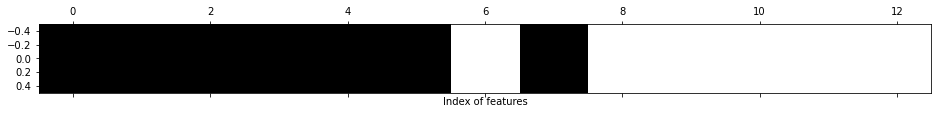

In [49]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of features')

We're fitting our training data to LogicalRegression and making prediction on our test data.
Accuracy of our model is around 100%, and that means 100/100 times we can make correct prediction.

In [60]:
X_test_s = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
score = lr.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Logistic Regerssion for Fraudulent Customer: {:.3f}'.format(score))

The score of Logistic Regerssion for Fraudulent Customer: 1.000


# Answers of the following questions:

2) We are given a DataSet to predict the Fraudulent which has the columns 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'.
Here we can see 'isFlagegdFraud' is our target variable and it has cotegorical value, so I have applied Logistic Regression ML Algorithm to predict the outcome. Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry also.

3) The most import inputs to predict the outcome are:
'type' : type method can say about the regularity of the customer, whether they make payment or took debit or made credit etc.
'amount' : the amount that they possess are also important to predict Fraudulent.
'oldBalanceOrg'
'newBalanceOrig'
'oldbalanceDest'
'newbalanceDest'
'isFraud'
'isFlaggedFraud' : it is our target variable.

4) I got 100% accuracy from my build model.

5) The key factors of fraudulent customers are:  
a) Customers Identity  
b) Regular payer or not
c) Old_balance
d) New_Balance
e) Past_Order_details

6) Yes, these factors offcourse help to predict fraudulent: 
Customers identity gives basic information like customer_id, address, phone_number, e_mail etc which helps to update the regularity of payment after purchase. This process will allow us to make column of Old_balance or new_balance or debit or credit. Purchasing history of customer can also answer the regurarity of customer.

7) To prevent from such fraudulity any company should regularly update its data in structured form about the customers everyday. Try to reduce mistakes while updating to reduce errors. 
Trying to maximise/keep regular payment option active for any regular or small or big transaction.
A good relations with customer should be there that will may reduce any kind of business conflicts between them.

8) This will reduce the irregularity payment from customers which will increase the old_balance or new_balance that will reduce the smoothness of the business.  